# Title

Developing a model in Predicting Stroke Risk Using Machine Learning: A Data-Driven Approach for Early Intervention in Healthcare

# problem Statement

### OVERVIEW

Did we all know that According to the World Health Organization (WHO), stroke is the second leading cause of death worldwide, accounting for approximately 11% of all deaths, specifically in Africa strokes are growing concern?

### Objective

Today, I will talk about a project on predicting stroke risk using machine learning. The goal is to Developing a Model  that helps healthcare professionals identify  likelihood of a patient experiencing a stroke, using clinical and lifestyle data. Allowing for timely and potentially life-saving interventions.

#  Data Description                                                    

### The dataset includes the following patient information:

**ID**:
- **Description**: Unique identifier for each patient.
- **Importance**: Essential for distinguishing between patients and tracking records.
- **Representation**: Categorical feature (unique values for each patient).
- **Potential impact**: Used for identification purposes; not used in prediction.

**AGE**:
- **Description**: Age of the patient.
- **Importance**: Risk of stroke increases with age. According to the WHO, the risk doubles every decade after 55.
- **Representation**: Numerical feature.


**HYPERTENSION**:
- **Description**: Binary indicator of whether the patient has high blood pressure.
- **Importance**: Hypertension is a major risk factor for stroke due to its potential to damage blood vessels.
- **Representation**: Binary feature (0 = no, 1 = yes).


**HEART-DISEASES**:
- **Description**: Binary indicator of whether the patient has heart disease.
- **Importance**: Heart disease can lead to clots that may travel to the brain, increasing stroke risk.
- **Representation**: Binary feature (0 = no, 1 = yes). 

**EVER_MARRIED**:
- **Description**: Marital status of the patient.
- **Importance**: Associated with lifestyle factors that may influence stroke risk, such as stress levels and physical activity.
- **Representation**: Binary feature (0 = no, 1 = yes).
 

**WORK_TYPE**:
- **Description**: Type of occupation.
- **Importance**: Different occupations may be linked to varying levels of stress and physical activity, impacting stroke risk.
- **Representation**: Categorical feature (e.g., children, government job, never worked, private job, self-employed).
- **Potential impact**: Varies by occupation, influencing stroke risk through lifestyle factors. 

**RESIDENCE_TYPE**:
- **Description**: Rural or urban living environment.
- **Importance**: Influences stroke risk through factors like healthcare access and lifestyle.
- **Representation**: Binary feature (0 = rural, 1 = urban).

**AVG_GLUCOSE_LEVEL**:
- **Description**: Average blood glucose level.
- **Importance**: High glucose levels can damage blood vessels, increasing stroke risk.
- **Representation**: Numerical feature. 
-**NB**: From Research The expected values for normal fasting blood glucose concentration are between 70 mg/dL (3.9 mmol/L) and 100 mg/dL (5.6 mmol/L).

**BMI**:
- **Description**: Body Mass Index.
- **Importance**: High BMI indicates obesity, a significant stroke risk factor.
- **Representation**: Numerical feature.
-**NB** From Research an healthy weight i.e the Body Mass Index should Range From 18.5 to 24.9

**SMOKING_STATUS**:
- **Description**: Smoking habits.
- **Importance**: Smoking damages blood vessels and increases blood pressure, raising stroke risk.
- **Representation**: Categorical feature (e.g., never smoked, formerly smoked, currently smoking). 

**GENDERS**:
- **Description**: Gender of the patient.
- **Importance**: Gender influences stroke risk due to biological differences and lifestyle patterns.
- **Representation**: Categorical feature (e.g., male, female).

**STROKE**:
- **Description**: Binary indicator of whether the patient has experienced a stroke.
- **Importance**: This is the target variable we aim to predict.
- **Representation**: Binary feature (0 = no stroke, 1 = stroke).

### Methodology
The steps followed in the project include:

1. **Importation of Libraries**: Loading necessary libraries for data manipulation, visualization, and model building.


2. **Data Preprocessing and Cleaning**: Handling missing values, encoding categorical variables, and normalizing numerical features.


3. **Exploratory Data Analysis (EDA)**: Analyzing the distribution and relationships of the features in the dataset.


4. **Feature Engineering**: Creating new features or modifying existing ones to enhance model performance.


5. **Feature Selection with Correlation Method**: Identifying the most relevant features using correlation analysis.


6. **Handling Data Imbalance**: Employing techniques like oversampling, undersampling, or using specialized algorithms to address class imbalance.


7. **Evaluation Metrics**: Defining metrics such as accuracy, precision, recall and F1-score for model evaluation.


8. **Hyperparameter Tuning**: Optimizing model parameters to improve performance.


9. **Comparison of Model Performances**: Comparing the performance of different models after tuning.


10. **Generating the Confusion Matrix After Hyperparameter Tuning**: Evaluating the tuned model with a confusion matrix.


11. **Cross Validation**: Performing cross-validation to ensure the model's robustness.


12. **Hold-Out Test**: Testing the best model (LightGBM) on an unseen dataset to evaluate its generalizability.


13. **Generating the Confusion Matrix After Hold-Out Test**: Assessing the performance of the model on unseen data.

.
14. **Model Interpretation with SHAP**: Using SHAP values to interpret the impact of each feature on the model's predictions.


15. **Model Saving**: Saving the final machine learning model using joblib for future use.


 ## IMPORTATION OF LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import sklearn 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(style="darkgrid")
plt.rcParams['figure.figsize']=(8,5)

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)



# DATA PREPROCESSING AND CLEANING

In [3]:
# importation of the dataset
stroke_set = pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke_set.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#checking the shape
stroke_set.shape

(5110, 12)

In [5]:
# dataset information 
# we are having 5110 l.e from 0 t0 5109 
# we have 12 columns in total
stroke_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
# statistical values of the numerical dataset 
stroke_set.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
stroke_set.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# Calculate the mean of the 'bmi' column
mean_bmi = stroke_set['bmi'].mean()

# Fill the missing values in the 'bmi' column with the calculated mean
stroke_set['bmi'] = stroke_set['bmi'].fillna(mean_bmi)


In [9]:
#re-checking if the null value had been cleared 
stroke_set.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
#checking for the unique values
stroke_set.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

# EXPLORATORY DATA ANALYSES ON THE STROKE DATASET

### UNIVARIATE ANALYSIS

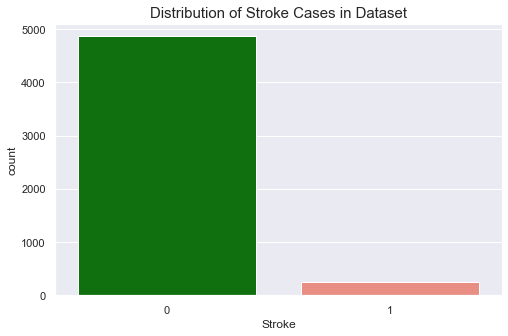

In [60]:
# Visualization on stroke 
# Distribution of Stroke Cases in Dataset (First 1000 rows)

plt.figure(figsize=(8, 5))
# custom_palette = ["green", "salmon"]
sns.countplot(x="stroke", data = stroke_set, orient="horizontal", palette = ["green","salmon"])
plt.xlabel('Stroke')
# plt.xticks(['No Stroke', 'Stoke patient'])
plt.title('Distribution of Stroke Cases in Dataset', fontsize=15)
plt.show()


**The plot shows the distribution of stroke cases (0 = no stroke, 1 = stroke) within the first 1000 rows of the dataset. This visualization helps to understand the proportion of individuals who have experienced a stroke, which is crucial for assessing the dataset's balance and preparing for predictive modeling.**


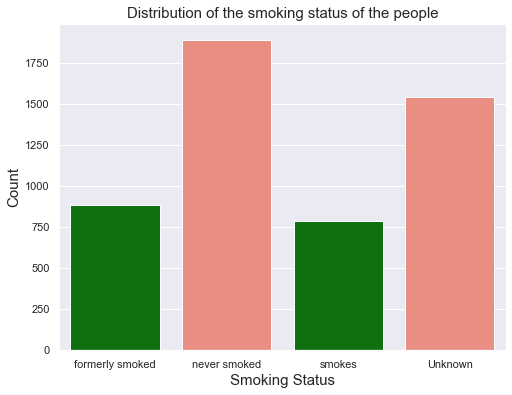

In [61]:
# Visualization using countplot
plt.figure(figsize=(8, 6))
sns.countplot(x="smoking_status", data=stroke_set, palette=["green","salmon"],orient="v")
plt.title('Distribution of the smoking status of the people',fontsize=15)
plt.xlabel('Smoking Status',fontsize =15)
plt.ylabel('Count', fontsize = 15)
plt.show()

**The plot shows more individuals .**

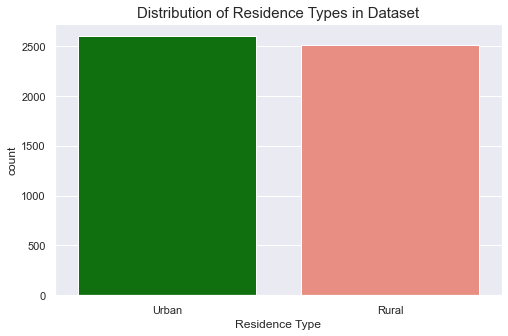

In [68]:
# visualization on the residence type
# the people who live in the urban area are more than that of the rural area

plt.figure(figsize=(8, 5))
sns.countplot(x="Residence_type", data=stroke_set, orient="horizontal",palette=["green","salmon"])
plt.xlabel('Residence Type')
plt.title('Distribution of Residence Types in Dataset',fontsize = 15)
plt.show()


**The plot shows the distribution of residence types (rural vs. urban) within the first 1000 rows of the dataset. It provides insights into the dataset's geographic diversity, which can influence health-related analyses such as stroke risk assessments based on environmental factors.**

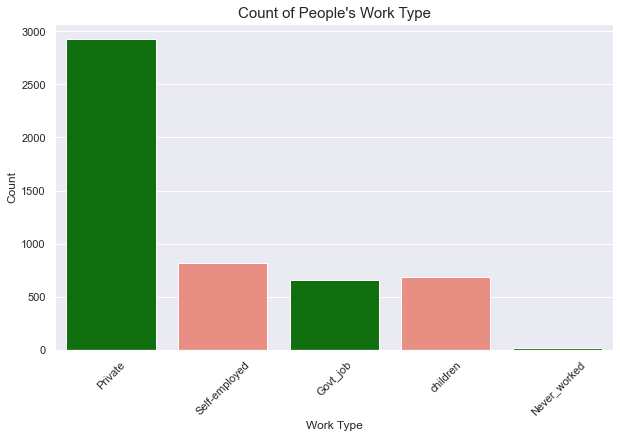

In [67]:
#work_type
# visualization on work_type 
# the people who worked in private company are more than others 
# the least are people who never worked at all 
plt.figure(figsize=(10, 6))
sns.countplot(x='work_type', data=stroke_set,palette=["green","salmon"])
plt.title("Count of People's Work Type", fontsize=15)
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better visibility
plt.show()

**The plot displays different types of work: Private and Self-employed are most common, showing various job influences on assessing the risk of stroke.**

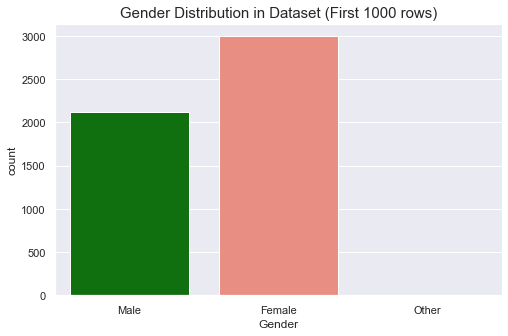

In [66]:
# visualization of gender
plt.figure(figsize=(8, 5))
custom_palette = ["green", "salmon"]
sns.countplot(x="gender", data=stroke_set, orient="horizontal",palette=["green","salmon"])
plt.xlabel('Gender')
plt.title('Gender Distribution in Dataset (First 1000 rows)',fontsize=15)
plt.savefig("gender-dist.png")
plt.show()

**From the visualisation above:**

  **The horizontal bar chart shows the gender distribution in a part of the dataset (the first 1000 rows). It reveals that there are more females than males. This information is important for understanding how different genders are represented, especially for health analyses like assessing the risk of stroke.**

# Univariate Pie Chart Analysis

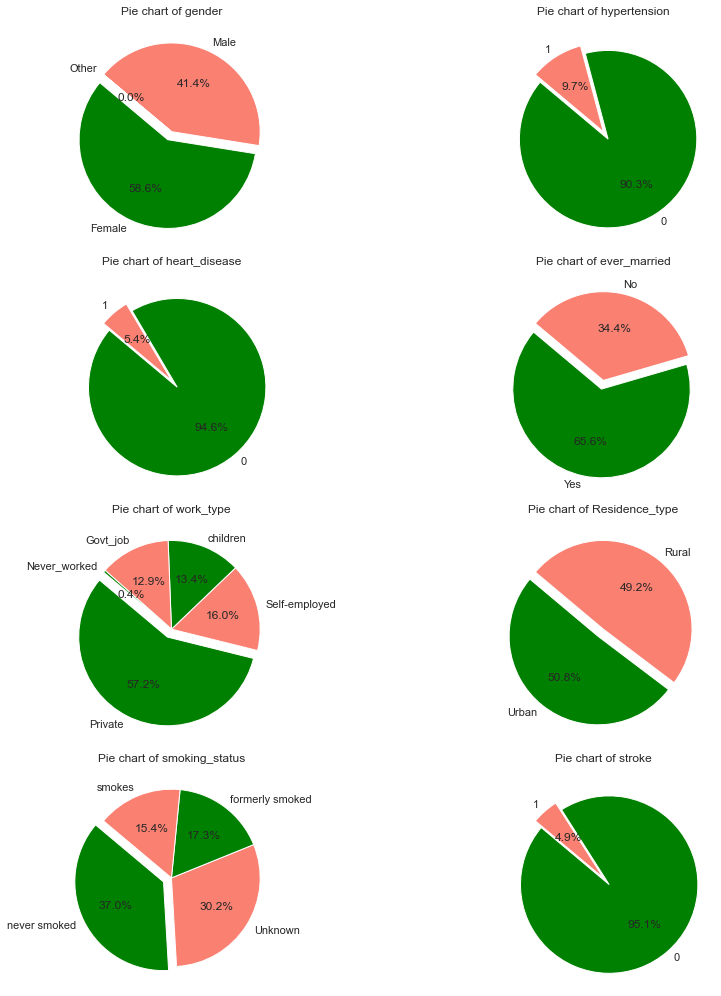

In [65]:
# "stroke_set" is your DataFrame and 'categorical' is the list of categorical columns
categorical = [
    "gender",
    "hypertension",
    "heart_disease",
    "ever_married",
    "work_type",
    "Residence_type",
    "smoking_status",
    "stroke"
]

# Calculate the number of rows and columns needed for subplots
n_cols = 2
n_rows = (len(categorical) + n_cols - 1) // n_cols

# Create a figure and axis objects with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 14))
axes = axes.flatten()

for i, column in enumerate(categorical):
    value_counts = stroke_set[column].value_counts()
    labels = value_counts.index  # Get the labels for the pie chart
    sizes = value_counts.values  # Get the sizes for the pie chart
    
    # Create the explode parameter dynamically
    explode = [0.1 if j == 0 else 0 for j in range(len(labels))]
    custom_palette = ["green", "salmon"]
    # Create a pie chart for the current column
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode,colors=custom_palette)
    axes[i].set_title(f'Pie chart of {column}')  # Set the title for the subplot

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# RESULT INTERPRETATION
1. **Pie chart of gender**:

      This chart displays how many patients are male versus female. Gender can affect stroke risk because of biological dissimilarities and lifestyle habits specific to each gender. If there's a big difference in the number of males and females, it could impact how accurately we can predict stroke risk for both genders using the model.
      

2. **Pie chart of hypertension**:

      This chart shows the percentage of patients who have hypertension compared to those who do not. Hypertension is a major risk factor for stroke. If there is a larger proportion of patients with hypertension in the dataset, it indicates a higher risk of stroke among the population studied. This distribution can affect how well the model learns the connection between hypertension and stroke.
      

3. **Pie chart of heart_disease**:

      This chart illustrates the percentage of patients who have heart disease versus those who do not. Heart disease is a major risk factor for stroke. The chart shows how common heart disease is within the dataset, which helps the model understand its influence on the risk of stroke.
      

4. **Pie chart of ever_married**:

      This chart displays the distribution of patients based on their marital status (married vs. never married). While marital status itself isn't a direct risk factor for stroke, it can be connected to lifestyle factors that do affect stroke risk. By understanding this distribution, we can assess how marital status indirectly influences predictions about stroke.
      
      
5. **Pie chart of work_type**:

      This chart shows how patients are distributed across various types of occupations. Different occupations can have different levels of stress and physical activity, which can affect the risk of stroke. The model can use this information to understand how lifestyle factors related to different types of work may impact the likelihood of having a stroke.
      
      
6. **Pie chart of Residence_type**:

      This chart shows how patients are divided between living in rural and urban areas. Where someone lives can affect their risk of stroke because of things like how easy it is to get healthcare and their lifestyle habits. Knowing this breakdown helps the model understand how the environment can influence the risk of stroke.
      

7. **Pie chart of smoking_status**:

      This chart displays the smoking habits of patients, categorizing them into groups such as never smoked, formerly smoked, and currently smoking. Smoking is a well-known risk factor for stroke. The distribution shown helps the model understand how common smoking is among the patients and how it influences the risk of stroke.
      

8. **Pie chart of stroke**:

      This chart displays the percentage of patients who have had a stroke compared to those who have not. This is the main variable of interest. Understanding this distribution is important because it shows whether strokes are evenly distributed or if there is an imbalance in how often they occur in the dataset. This can impact how well the model works and whether special techniques are needed to handle data imbalances, like adjusting the number of samples for each group.



## BIVARIATE ANALYSIS

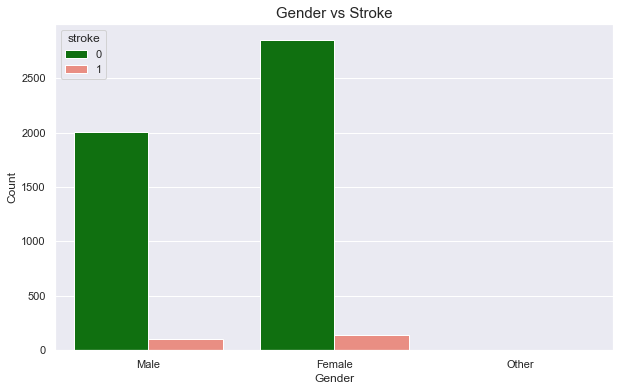

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(x="gender", hue="stroke", data=stroke_set, palette=["green","salmon"])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs Stroke',fontsize = 15)
plt.show()


**This plot compares the number of strokes between males and females. It shows how strokes vary between genders, which helps identify differences in stroke prevalence based on gender. This information is important for targeting specific health interventions and for analyzing different risk factors related to strokes in men and women.**

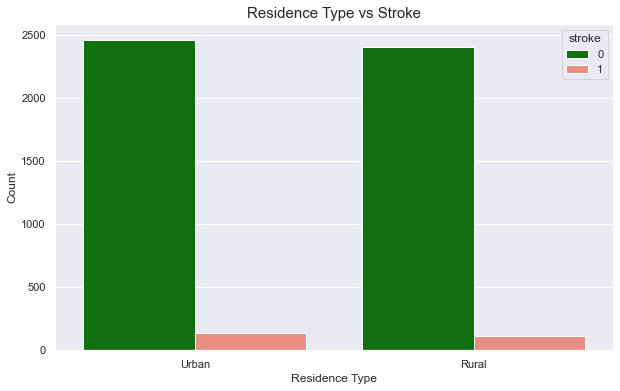

In [71]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Residence_type", hue="stroke", data=stroke_set, palette= ["green","salmon"])
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.title('Residence Type vs Stroke',fontsize=15)
plt.show()


**This plot compares how often strokes happen in urban versus rural areas. It shows differences in stroke rates influenced by factors like where people live and their lifestyles. This helps decide where to focus health programs and make policies that can help prevent strokes.**

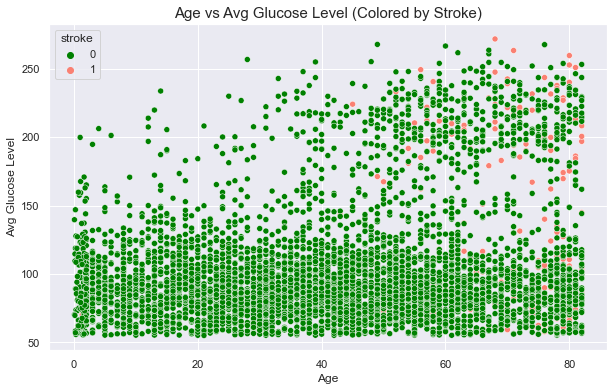

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="age", y="avg_glucose_level", hue="stroke", data=stroke_set, palette= ["green","salmon"])
plt.xlabel('Age'),
plt.ylabel('Avg Glucose Level')
plt.title('Age vs Avg Glucose Level (Colored by Stroke)',fontsize = 15)
plt.show()


**The scatter plot shows that there are more people without stroke clustered together, which suggests that they have a lower risk of stroke. It also points out certain age and glucose level ranges that might be linked to higher risks of stroke.**

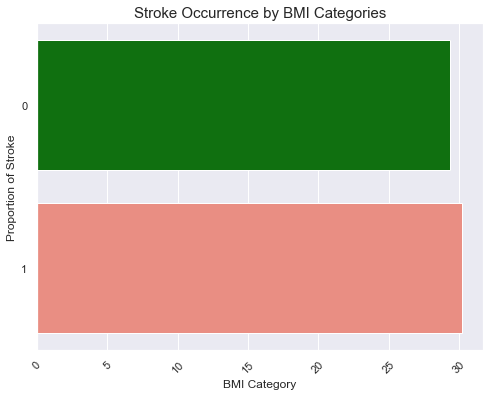

In [19]:
# visualization of bmi and stroke
# the high value bmi as mo stroke than that of the low value bmi
# thius is due to the large amount of weight in aperson which have high tendency for stroke
plt.figure(figsize=(8,6))
sns.barplot( x="bmi", y= "stroke" ,data= stroke_set[:1000],orient = "h",ci=None,palette= ["green", "salmon"])
plt.title("Stroke Occurrence by BMI Categories",fontsize = 15)
plt.xlabel("BMI Category")
plt.ylabel("Proportion of Stroke")
plt.xticks(rotation=45)
plt.show()

**People who have higher BMI (body mass index) categories are more likely to have a stroke. This shows that being heavier is closely linked with a higher chance of having a stroke.**

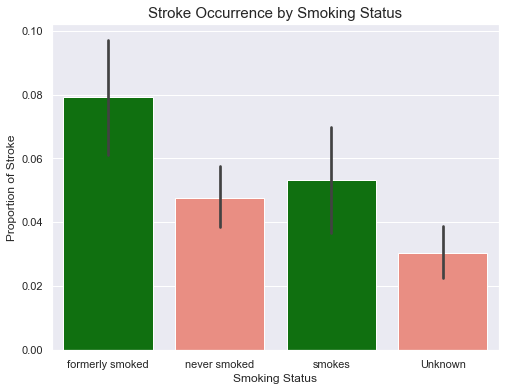

In [20]:
# visualization of smoking_satus vs stroke
# those who formally smoked have more high tendency for stroke 
# the people who never smoked are less tendency for stroke
# but from the visualization we see that all can still unque values of the smoking_satus can still have stroke
plt.figure(figsize=(8, 6))
sns.barplot(x="smoking_status", y="stroke", data=stroke_set[:10000], orient="v",palette= ["green", "salmon"])
plt.title("Stroke Occurrence by Smoking Status", fontsize=15)
plt.xlabel("Smoking Status")
plt.ylabel("Proportion of Stroke")
plt.show()

**Former smokers are more likely to have a stroke compared to people who have never smoked. However, even those who have never smoked still have some risk of having a stroke. This shows that the risk of having a stroke applies to everyone, regardless of whether they smoke or not.**

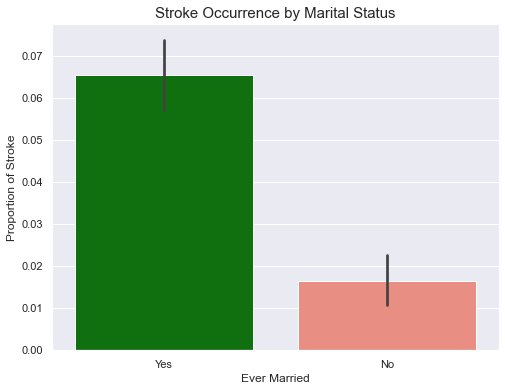

In [21]:
# visualization of ever_married vs stroke
# more people in marriage or who had married before have high tendency for stroke than those thay hadn't gotten  married before
# this could be because those that had gitten married before are already older
plt.figure(figsize=(8, 6))
sns.barplot(x="ever_married", y="stroke", data=stroke_set[:10000], orient="v",palette= ["green", "salmon"])
plt.title("Stroke Occurrence by Marital Status", fontsize=15)
plt.xlabel("Ever Married")
plt.ylabel("Proportion of Stroke")
plt.show()

**Married people have a higher proportion of strokes compared to those who are not married, indicating a relationship between marital status and stroke risk.**

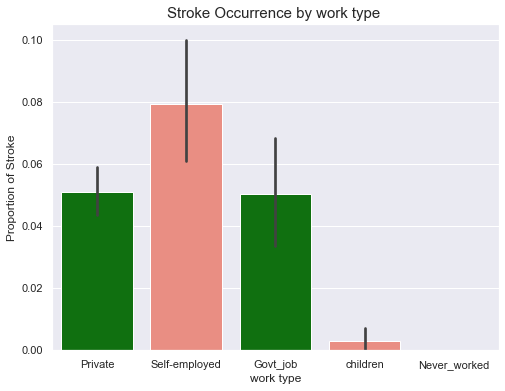

In [22]:
# visualization of work_type vs stroke
# people who are selfemployed have are those who have high tendency for stroke
# those that never work and childrens are the onces with least tendency for stroke
plt.figure(figsize=(8, 6))
sns.barplot( x="work_type", y= "stroke" ,data= stroke_set[:10000],orient = "v", palette = ["green", "salmon"])
plt.title("Stroke Occurrence by work type ", fontsize=15)
plt.xlabel("work type")
plt.ylabel("Proportion of Stroke")
plt.show()

**From the Univariate analysis we did earlier,we found that there are more people in private jobs. However, when we looked at how many of them had strokes compared to other job types, self-employed people had the highest risk, followed by those in private jobs and then government jobs.**

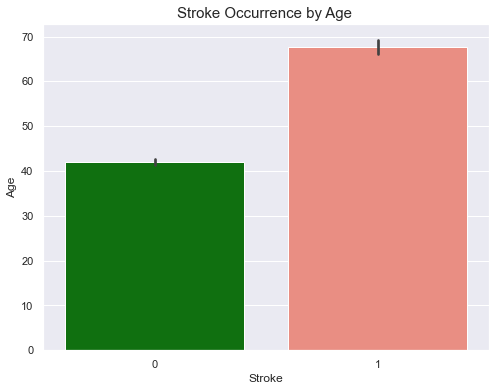

In [23]:

# visualization on age vs stroke
# from the graph the older ones have high tendency for stroke
# this is due to ageing 
plt.figure(figsize=(8,6))
sns.barplot( x="stroke", y="age" ,data= stroke_set[:10000],orient = "v",palette = ["green", "salmon"])
plt.title("Stroke Occurrence by Age ", fontsize=15)
plt.xlabel("Stroke")
plt.ylabel("Age")
plt.show()

**Older people are more likely to have a stroke. This shows that age is a major risk factor for stroke, probably because of long-term health problems and changes in the body as people get older.**

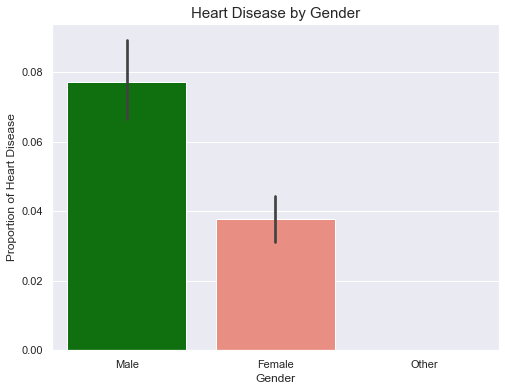

In [24]:
# the male gender have more high tendencyt to the stroke than female
# this is because male engage in maore stressful jobs and don't takecare of their health as much as the female
# Visualization of gender vs heart_disease
plt.figure(figsize=(8, 6))
sns.barplot(x="gender", y="heart_disease", data=stroke_set[:10000], palette= ["green", "salmon"])
plt.title("Heart Disease by Gender", fontsize=15)
plt.xlabel("Gender")
plt.ylabel("Proportion of Heart Disease")
plt.show()

**From this plot , Men has heart disease than women. This might be because men tend to have more stressful lifestyles and may not pay as much attention to managing their health.**


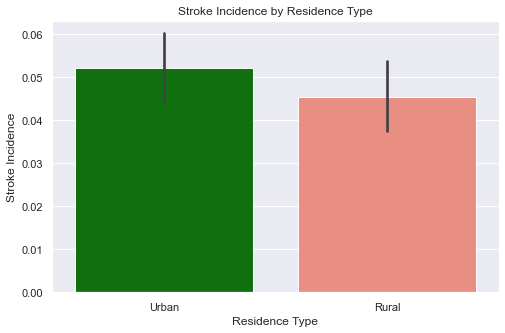

In [25]:
# visualization of RESIDENCE_TYPE AND STROKE
# most people in the urban enviroment have more high tendency for stroke than that of those in the rural enviroment



# Plot the bar plot for Residence_type and Stroke
sns.barplot(x="Residence_type", y="stroke", data=stroke_set[:10000], palette= ["green", "salmon"])
plt.rcParams['figure.figsize'] = (8, 6)
plt.title("Stroke Incidence by Residence Type")
plt.xlabel("Residence Type")
plt.ylabel("Stroke Incidence")
plt.show()

**From the visuals above we could clearly see that, stroke rates are higher in urban areas compared to rural areas.**

In [26]:
"Resident_type" in stroke_set.columns.tolist()

False

In [27]:
d = stroke_set.groupby("Residence_type")["stroke"].count()
d

Residence_type
Rural    2514
Urban    2596
Name: stroke, dtype: int64

# Trivariate visualisation of different attributes

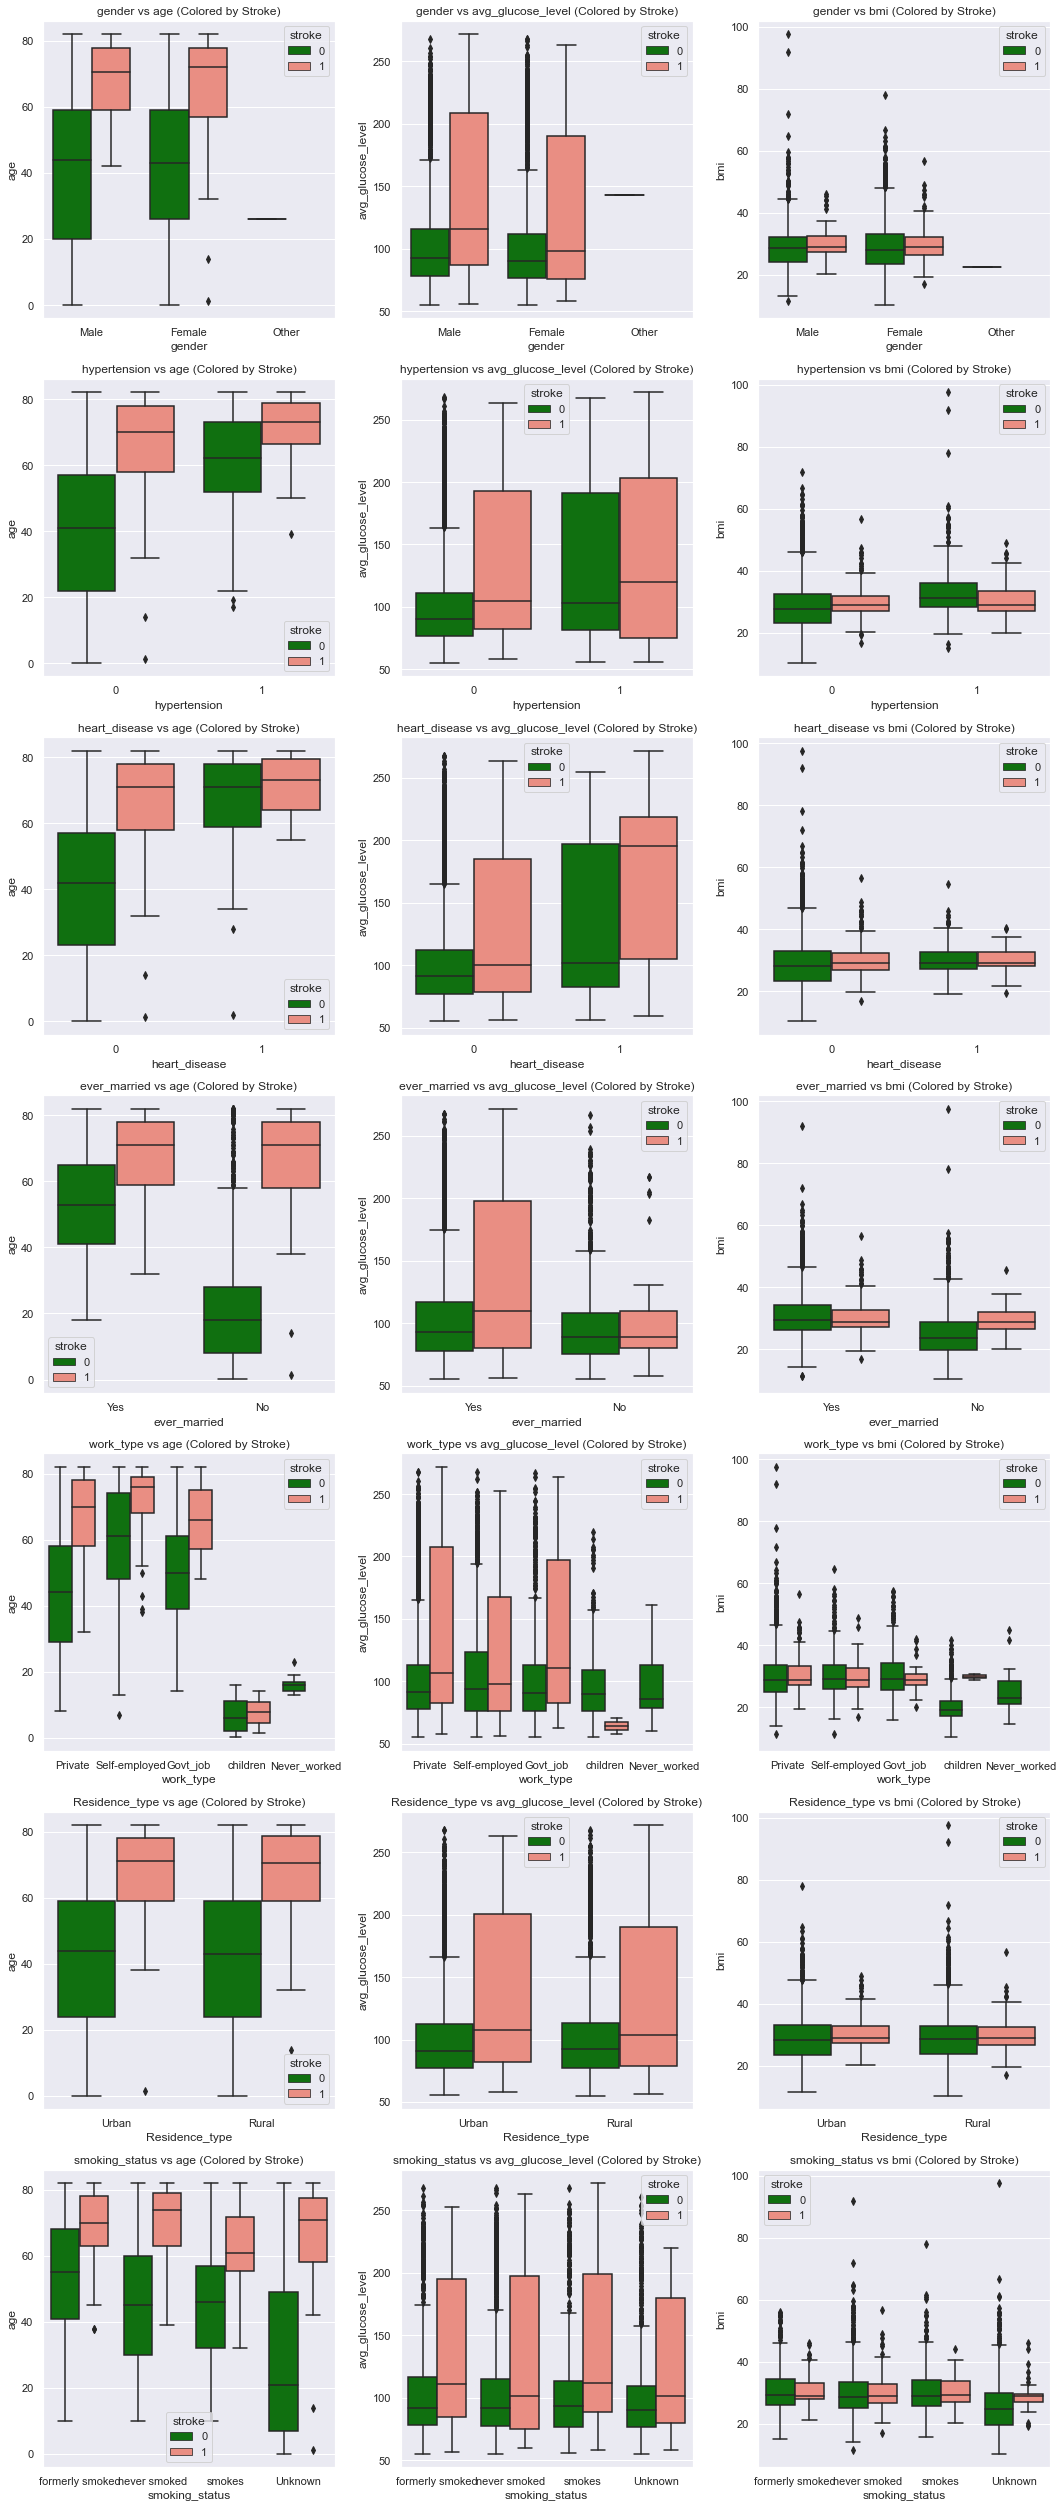

In [28]:
categorical = [
    "gender",
    "hypertension",
    "heart_disease",
    "ever_married",
    "work_type",
    "Residence_type",
    "smoking_status"
]

# Set the color palette
sns.set_palette("Set1_r")

# Define numerical variables to plot against categorical variables
numerical_variables = ["age", "avg_glucose_level", "bmi"]

# Calculate number of rows for subplots
num_cols = len(categorical)
num_rows = (len(numerical_variables) * num_cols + 2) // 3

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, cat_var in enumerate(categorical):
    for j, num_var in enumerate(numerical_variables):
        sns.boxplot(x=cat_var, y=num_var, hue="stroke", data=stroke_set, ax=axes[i * len(numerical_variables) + j],palette= ["green", "salmon"])
        axes[i * len(numerical_variables) + j].set_title(f'{cat_var} vs {num_var} (Colored by Stroke)')
        axes[i * len(numerical_variables) + j].set_xlabel(cat_var)
        axes[i * len(numerical_variables) + j].set_ylabel(num_var)

# Hide any empty subplots
for k in range(num_cols * len(numerical_variables), len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout()
plt.show()



# Results interpretation

### The salmon box plot represents individuals who have had a stroke, while the green box plot represents those who have not experienced a stroke.

1.**Gender vs Age (coloured by stroke):**
- Median age for males with stroke (green) ≈ 75 years; without stroke (yellow) ≈ 60 years.
- Median age for females with stroke ≈ 70 years; without stroke ≈ 60 years.
- Older age correlates with higher stroke risk across genders.

**Getting older is a big risk factor for having a stroke, whether you are male or female.**


2.**Gender vs Average glucose level(coloured by stroke):**
NB: From research, the expected values for normal fasting blood glucose concentration are between 70 mg/dL (3.9 mmol/L) and 100 mg/dL (5.6 mmol/L). 

From the visualization above, we observe:
- Median glucose level for males without stroke ≈ 70 mg/dL; with stroke ≈ 120 mg/dL.
- Median glucose level for females without stroke ≈ 70 mg/dL; without stroke ≈ 100 mg/dL.

**Higher levels of glucose (sugar) in the blood are linked to a higher chance of having a stroke for both men and women. This suggests that there are risk factors related to glucose levels besides just BMI.**


3.**Gender vs Bmi (coloured by stroke):**

- Average median BMI for males with stroke ≈ 28; without stroke ≈ 26.
- Average median BMI for females with stroke ≈ 30; without stroke ≈ 27.

**BMI suggests a higher risk of stroke, particularly in obese women. However, the variability in this risk means that using BMI alone to assess stroke risk is complicated. These observations suggest that BMI itself may not directly cause strokes.**


4.**Hypertention versus Age(coloured with stroke):**

- Average Median Age of people without stroke and without hypertension ≈ 42 years
- Average Median Age of people with stroke and without hypertension ≈ 70 years
- Average Median Age of people without stroke and with hypertension ≈ 63 years
- Average Median Age of people with stroke and with hypertension ≈ 75 years

**The age of a person suggests that high blood pressure is linked to having a stroke, affecting the average age significantly across various health conditions..**

5.**Hypertention versus average glucose level(coloured with stroke):**
- Median average glucose level for people with stroke and without hypertension ≈ 110 mg/dL; without stroke but with hypertension ≈ 70 mg/dL.

**Higher levels of glucose (sugar) in the blood are linked to a higher risk of having a stroke, especially in people who do not have high blood pressure. This highlights the importance of controlling glucose levels for overall health.**

6.**Hypertension vs Bmi (coloured by stroke)**
- Median BMI without hypertension but with stroke ≈ 30; with hypertension without stroke ≈ 31.
- Median BMI with hypertension without stroke ≈ 35; with hypertension and stroke ≈ 29

**In stroke cases, having high blood pressure (hypertension) is associated with lower BMI (body mass index), indicating different effects on metabolism and health conditions.**

7.**Hypertention vs Heart Disease (coloured by stroke)**: 
- Average median age without heart disease and stroke ≈ 41; without heart disease but with stroke ≈ 75.
- Average median age with heart disease without stroke ≈ 75; with heart disease and stroke ≈ 79.

**The data clearly shows that people who have both heart disease and stroke are much older on average compared to those who have only one of these conditions or none at all. This emphasizes how these health problems can affect people as they get older.**

8.**Heart Diseases vs Average glucose level(coloured by stroke)**
- Average median glucose level without heart disease and stroke ≈ 70 mg/dL; without heart disease but with stroke ≈ 100 mg/dL.
- Average median glucose level with heart disease without stroke ≈ 100 mg/dL; with stroke and heart disease ≈ 190 mg/dL.

**The noticeable rise in average glucose levels among people who have both heart disease and stroke emphasizes the increased health risks linked with having both conditions together.**

9.**Heart Diseases vs Bmi (coloured by stroke)**
- Average median glucose level without heart disease and stroke ≈ 70 mg/dL; without heart disease but with stroke ≈ 100 mg/dL.
- Average median glucose level with heart disease without stroke ≈ 100 mg/dL; with stroke and heart disease ≈ 190 mg/dL.

**People who have both heart disease and stroke tend to have much higher glucose levels. This shows that having both conditions together increases health risks, emphasizing the importance of closely managing glucose levels.**

10.**Ever married vs Age(coloured by stroke)**
- Average median age of married without stroke ≈ 50 years; married with stroke ≈ 70 years.
- Average median age of not married without stroke ≈ 10 years; not married with stroke ≈ 70 years.

**As people get older, their risk of having a stroke goes up, regardless of whether they are married or not. Younger people who are not married have a lower chance of having a stroke.**

11.**Ever married vs Average median glucose level (coloured by stroke)**
- Average median glucose level of married without stroke ≈ 80 mg/dL; married with stroke ≈ 120 mg/dL.
- Average median glucose level of not married without stroke ≈ 70 mg/dL; not married with stroke ≈ 70 mg/dL.

**Higher glucose levels in married individuals with stroke suggest a relatinship between glucose management and stroke risk, not evident in unmarried individuals.**

12.**Ever married vs Bmi(coloured by stroke)**
- Average median BMI of married without stroke ≈ 30; married with stroke ≈ 31.
- Average median BMI of not married without stroke ≈ 22; not married with stroke ≈ 30.

**Higher BMI in married individuals, both with and without stroke, suggests marital status may influence BMI, with notable increases in unmarried stroke cases.**

13.**Work Type vs Age(coloured by stroke)**

- Average median age of private job without stroke ≈ 45 years; private job with stroke ≈ 70 years.
- Average median age of self-employed without stroke ≈ 65 years; self-employed with stroke ≈ 78 years.
- Average median age of government job without stroke ≈ 50 years; government job with stroke ≈ 65 years.
- Average median age of children without stroke ≈ 10 years; with stroke ≈ 15 years.
- Average median age of never worked without stroke ≈ 18 years; with stroke did not show.

**Older age is associated with more cases of stroke across different types of employment. Self-employed individuals, in particular, show the largest difference in age between those who have had a stroke and those who have not.**

14.**Work Type vs Average Glucose Level(coloured by stroke)**

- Average median glucose level of private job without stroke ≈ 80 mg/dL; private job with stroke ≈ 120 mg/dL.
- Average median glucose level of self-employed without stroke ≈ 75 mg/dL; self-employed with stroke ≈ 90 mg/dL.
- Average median glucose level of government job without stroke ≈ 70 mg/dL; government job with stroke ≈ 120 mg/dL.
- Average median glucose level of children without stroke ≈ 60 mg/dL; with stroke ≈ 20 mg/dL.
- Average median glucose level of never worked without stroke ≈ 60 mg/dL; with stroke did not show.

**Higher glucose levels are related to increased stroke risk, particularly in private and government jobs. Unusual results for children warrant further investigation.**

15.**Work Type vs BMI(coloured by stroke)**
- Average median BMI of private job without stroke ≈ 30 kg/m²; private job with stroke ≈ 30 kg/m².
- Average median BMI of self-employed without stroke ≈ 30 kg/m²; self-employed with stroke ≈ 29 kg/m².
- Average median BMI of government job without stroke ≈ 29 kg/m²; government job with stroke ≈ 29 kg/m².
- Average median BMI of children without stroke ≈ 20 kg/m²; with stroke ≈ 30 kg/m².
- Average median BMI of never worked without stroke ≈ 22 kg/m²; with stroke did not show.

**BMI remains consistent across employment types for stroke and non-stroke cases, except in children where stroke correlates with higher BMI.**

16.**Residence Type vs Age(coloured by stroke)**
- Average median age of people living in urban areas without stroke ≈ 45 years; urban with stroke ≈ 70 years.
- Average median age of people living in rural areas without stroke ≈ 45 years; rural with stroke ≈ 70 years.

**Having a stroke affects people's age in both cities and rural areas. On average, people without a stroke are around 45 years old, while those who have had a stroke are typically around 70 years old.**

17.**Residence Type vs Average glucose level (coloured by stroke)**
- Average median glucose level of people living in urban areas without stroke ≈ 70 mg/dL; urban with stroke ≈ 120 mg/dL.
- Average median glucose level of people living in rural areas without stroke ≈ 65 mg/dL; rural with stroke ≈ 110 mg/dL.

**Higher glucose levels correlate with stroke incidence in both urban and rural areas, with urban areas showing a slightly greater increase.**

18.**Residence Type vs Average glucose level (coloured by stroke)**
- Average median BMI of people living in urban areas without stroke ≈ 29 kg/m²; urban with stroke ≈ 30 kg/m².
- Average median BMI of people living in rural areas without stroke ≈ 30 kg/m²; rural with stroke ≈ 30 kg/m².

**In both urban and rural areas, the average BMI (Body Mass Index) doesn't change much between people who have had a stroke and those who haven't. This suggests that BMI doesn't vary significantly with the occurrence of stroke.**

19.**Smoking Status versus Age (coloured by stroke)**
- Average median age of formerly smoked without stroke ≈ 55 years; with stroke ≈ 70 years.
- Average median age of never smoked without stroke ≈ 45 years; with stroke ≈ 75 years.
- Average median age of smoked without stroke ≈ 45 years; with stroke ≈ 62 years.
- Average median age of unknown smoking status without stroke ≈ 22 years; with stroke ≈ 70 years.

**The data shows that regardless of whether someone used to smoke, currently smokes, or never smoked, people who have had a stroke tend to be older on average compared to those who haven't had a stroke. This suggests that strokes generally occur at an older age, regardless of past smoking habits. However, the age difference between those who had a stroke and those who didn't varies within each group of smokers and non-smokers. This shows that age, smoking history, and stroke risk interact in complex ways.**

20.**Smoking Status versus Average median glucose level (coloured by stroke)**
- Average median glucose level of formerly smoked without stroke ≈ 70 mg/dL; with stroke ≈ 110 mg/dL.
- Average median glucose level of never smoked without stroke ≈ 70 mg/dL; with stroke ≈ 105 mg/dL.
- Average median glucose level of smoked without stroke ≈ 70 mg/dL; with stroke ≈ 110 mg/dL.
- Average median glucose level of unknown smoking status without stroke ≈ 70 mg/dL; with stroke ≈ 105 mg/dL.

**These findings suggest that people who had a stroke typically had higher average glucose levels compared to those who did not have a stroke, regardless of whether they smoked before or currently. This highlights that elevated glucose levels might be a significant risk factor for stroke, independent of smoking habits.**


21.**Smoking Status versus Bmi (coloured by stroke)**
- Average median BMI of formerly smoked without stroke ≈ 30 kg/m²; with stroke ≈ 29 kg/m².
- Average median BMI of never smoked without stroke ≈ 29 kg/m²; with stroke ≈ 29 kg/m².
- Average median BMI of smoked without stroke ≈ 29 kg/m²; with stroke ≈ 29 kg/m².
- Average median BMI of unknown smoking status without stroke ≈ 25 kg/m²; with stroke ≈ 29 kg/m².

**The analysis shows that having a stroke doesn't seem to change the average BMI levels significantly among people with different smoking habits. Whether someone used to smoke, never smoked, or their smoking status is unknown, their BMI levels stay fairly consistent before and after a stroke. This suggests that BMI might not have a big impact on whether someone has a stroke or how severe it is in this study. Other factors like age, lifestyle, and existing health conditions may be more important in determining stroke risk and how serious it is than BMI alone.**





### 3D scatterplot

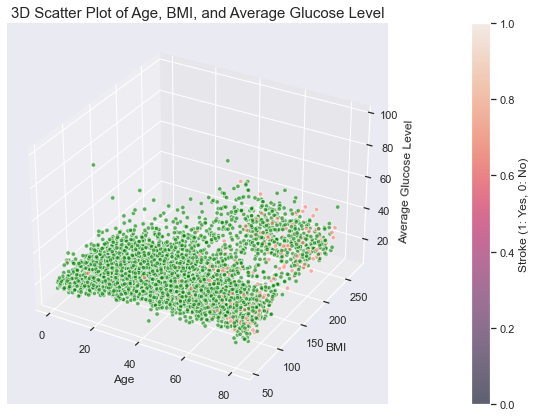

In [29]:
from mpl_toolkits.mplot3d import Axes3D

# Create 3D scatter plot
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111, projection='3d')

# Map stroke values to colors
stroke_colors = stroke_set['stroke'].map({0: 'green', 1: 'salmon'})

# Scatter plot
scatter = ax.scatter(stroke_set['age'], stroke_set['avg_glucose_level'], stroke_set['bmi'], 
                    c=stroke_colors ,  s=20,alpha=0.6, edgecolors='w')

# Labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Average Glucose Level')
ax.set_zlabel('BMI')
ax.set_title('3D Scatter Plot of Age, BMI, and Average Glucose Level',fontsize = 15)

# Add color bar
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Stroke (1: Yes, 0: No)')

plt.show()

***The 3D scatter plot above, shows the relationship between age, average glucose level, and BMI in the context of stroke status. Points are color-coded to indicate stroke occurrence***

### Our Observations From The 3D Scatter Plot Above:
1. **Age and Glucose Level**: 
   - Stroke patients are generally older and exhibit higher glucose levels, which correlates with previous findings. 
   
2. **BMI**: 
   - BMI does not distinctly separate stroke patients from non-stroke patients, as there is considerable overlap in BMI values between the two groups.

This concludes our advanced analysis, shows a range of plots from basic distributions to multi-variable interactions.

# From the above charts, we can see that there are many outliers. 
**Therefore, we will Handling the outliers in the "average glucose level" and "bmi" columns.**

In [30]:
#Outlier-Handling

def fixing_outlier(col):
    # Calculate the 25th and 75th percentiles (Q1 and Q3) for the column
    quantile_25 = stroke_set[col].quantile(0.25)
    quantile_75 = stroke_set[col].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = quantile_75 - quantile_25
    
    # Define the upper and lower bounds for detecting outliers
    upper = quantile_75 + 1.5 * IQR
    lower = quantile_25 - 1.5 * IQR
    
    print()
    print(f'-------------------------- {col} --------------------------')
    print()
    
    # Print the number of outliers detected
    print(f'Outlier found in {stroke_set.loc[(stroke_set[col] > upper) | (stroke_set[col] < lower)].shape[0]} Rows')
    print('---------------------------------')
    
    # Print the upper and lower limits for outlier detection
    print('upper and lower limits for outlier detection')
    print(f'Upper limit :- {upper}')
    print(f'Lower limit :- {lower}')
    print('---------------------------------')
    
    # Create a DataFrame containing the outliers
    new = stroke_set.loc[(stroke_set[col] > upper) | (stroke_set[col] < lower)]
    
    # Replace the outliers with the upper or lower limit
    stroke_set[col] = np.where(stroke_set[col] > upper,
                       upper,
                       np.where(stroke_set[col] < lower,
                                lower,
                                stroke_set[col]))
    
    # Print the number of outliers after modification
    print('After modifying all the rows')
    print(f'Outlier found in {stroke_set.loc[(stroke_set[col] > upper) | (stroke_set[col] < lower)].shape[0]} Rows')
    print()
    print('----------------------- Modified Rows ------------------------')
    
    # Return the DataFrame containing the original outliers
    return stroke_set.loc[new.index]


### Handling  the outlier in the avg_glucose_level column

In [31]:
#fixing  the outlier in the avg_glucose_level
fixing_outlier('avg_glucose_level')


-------------------------- avg_glucose_level --------------------------

Outlier found in 627 Rows
---------------------------------
upper and lower limits for outlier detection
Upper limit :- 169.35750000000002
Lower limit :- 21.977500000000006
---------------------------------
After modifying all the rows
Outlier found in 0 Rows

----------------------- Modified Rows ------------------------


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,169.3575,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,169.3575,28.893237,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,169.3575,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.000000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,169.3575,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5061,38009,Male,41.0,0,0,Yes,Private,Urban,169.3575,32.300000,never smoked,0
5062,11184,Female,82.0,0,0,Yes,Self-employed,Rural,169.3575,36.900000,never smoked,0
5063,68967,Male,39.0,0,0,Yes,Private,Urban,169.3575,27.700000,Unknown,0
5064,66684,Male,70.0,0,0,Yes,Self-employed,Rural,169.3575,24.300000,Unknown,0


### Handling the outlier in the "bmi column"

In [32]:
fixing_outlier('bmi')


-------------------------- bmi --------------------------

Outlier found in 126 Rows
---------------------------------
upper and lower limits for outlier detection
Upper limit :- 46.29999999999999
Lower limit :- 10.300000000000006
---------------------------------
After modifying all the rows
Outlier found in 0 Rows

----------------------- Modified Rows ------------------------


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
21,13861,Female,52.0,1,0,Yes,Self-employed,Urban,169.3575,46.3,never smoked,1
66,17004,Female,70.0,0,0,Yes,Private,Urban,169.3575,46.3,never smoked,1
113,41069,Female,45.0,0,0,Yes,Private,Rural,169.3575,46.3,never smoked,1
254,32257,Female,47.0,0,0,Yes,Private,Urban,169.3575,46.3,Unknown,0
258,28674,Female,74.0,1,0,Yes,Self-employed,Urban,169.3575,46.3,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4906,72696,Female,53.0,0,0,Yes,Private,Urban,70.5100,46.3,never smoked,0
4952,16245,Male,51.0,1,0,Yes,Self-employed,Rural,169.3575,46.3,never smoked,0
5009,40732,Female,50.0,0,0,Yes,Self-employed,Rural,126.8500,46.3,formerly smoked,0
5057,38349,Female,49.0,0,0,Yes,Govt_job,Urban,69.9200,46.3,never smoked,0


In [33]:
stroke_set

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,169.3575,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,169.3575,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.9200,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,169.3575,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.7500,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.2000,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.9900,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.2900,25.600000,formerly smoked,0


### plotting the box plot after handling the outlier for the average glucose level and stroke column

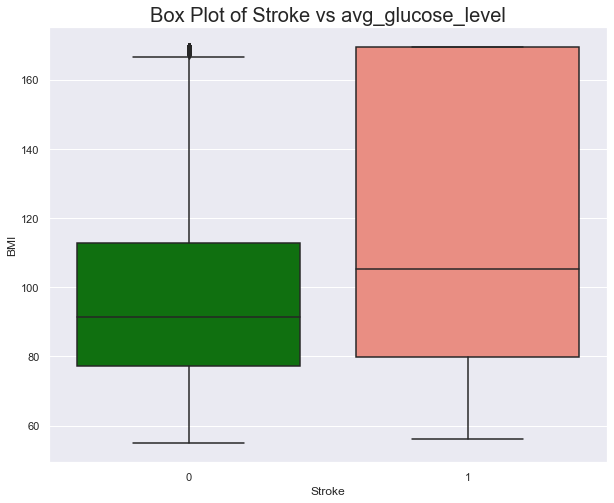

In [34]:
# Set the color palette
sns.set_palette("Set1")

# Create a figure and axes for subplots
fig, axes = plt.subplots(figsize=(10, 8))

# Plot 3: Box plot of Stroke vs BMI
sns.boxplot(x='stroke', y='avg_glucose_level', data=stroke_set,palette=["green","salmon"])
plt.title('Box Plot of Stroke vs avg_glucose_level', fontsize = 20)
plt.xlabel('Stroke')
plt.ylabel('BMI')

# Show plot
plt.show()

**After Handling The Outlier,Box-Plot Shows No Outliers**

In [35]:
stroke_set['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [36]:
stroke_set.drop(stroke_set.loc[stroke_set['gender']=='Other'].index,inplace=True) # droping 1 row
stroke_set['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [37]:
stroke_set.reset_index(drop=True,inplace=True) # resetting the index of data-frame

# Pairplot Analysis

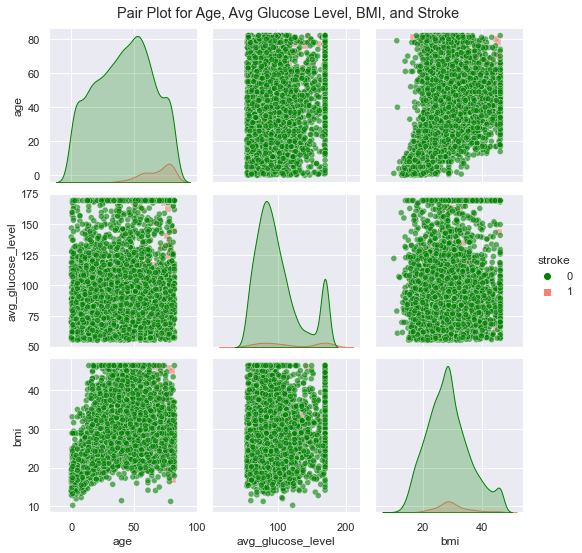

In [38]:
# Select the relevant columns for the pair plot
selected_columns = stroke_set[['age', 'avg_glucose_level', 'bmi', 'stroke']]

# Create a pair plot with color palette set to Set1_r
sns.pairplot(selected_columns, hue="stroke", diag_kind="kde", markers=["o", "s"], plot_kws={'alpha':0.6}, palette=["green","salmon"])
plt.suptitle("Pair Plot for Age, Avg Glucose Level, BMI, and Stroke", y=1.02)
plt.show()


### It can be observerd from the pair plot visualisation that:

- **The green (no stroke) group is larger than the salmon (stroke) group in the dataset.**
  
- **Variation in Features: Age, average glucose level, and BMI show different patterns between those without stroke (green) and those with stroke (salmon). This suggests that these factors may vary between the two groups.**

# Feature engineering

In [39]:
stroke_set

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,169.3575,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,169.3575,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.9200,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,169.3575,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,18234,Female,80.0,1,0,Yes,Private,Urban,83.7500,28.893237,never smoked,0
5105,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.2000,40.000000,never smoked,0
5106,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.9900,30.600000,never smoked,0
5107,37544,Male,51.0,0,0,Yes,Private,Rural,166.2900,25.600000,formerly smoked,0


In [40]:
#Getting the unique values of the categorical nominal variable for the work_type column
stroke_set["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [41]:
#Getting the unique values of the categorical nominal variable for smoking_satus column
stroke_set["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

## Creating a new feature called the "Risk Increase" which is gotten from the age and stroke column: 
### This new feature , provides a measure of stroke risk based on age and it also accounts for the cumulative experience of stroke incidence in younger individuals, giving a sense of how risk changes with age.

In [42]:
def calculate_risk_increase(stroke_set):
    # Create a list to store the risk for each age
    risk_increase = []
    
    # Calculate risk for each age
    for age in stroke_set['age']:
        # Select all people younger than the current age
        subset = stroke_set[stroke_set['age'] < age]
        if len(subset) == 0:
            risk = 0
        else:
            # Calculate the risk (proportion of strokes)
            risk = subset['stroke'].sum() / len(subset)
        risk_increase.append(risk)
    
    return risk_increase

# Add the calculated risk as a new column
stroke_set['risk_increase'] = calculate_risk_increase(stroke_set)

# Display the DataFrame with the new column
stroke_set


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,risk_increase
0,9046,Male,67.0,0,1,Yes,Private,Urban,169.3575,36.600000,formerly smoked,1,0.023073
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,169.3575,28.893237,never smoked,1,0.018922
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.9200,32.500000,never smoked,1,0.042454
3,60182,Female,49.0,0,0,Yes,Private,Urban,169.3575,34.400000,smokes,1,0.006028
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.000000,never smoked,1,0.039686
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,18234,Female,80.0,1,0,Yes,Private,Urban,83.7500,28.893237,never smoked,0,0.042454
5105,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.2000,40.000000,never smoked,0,0.045263
5106,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.9900,30.600000,never smoked,0,0.001627
5107,37544,Male,51.0,0,0,Yes,Private,Rural,166.2900,25.600000,formerly smoked,0,0.007713


### Handling the outliers in the Risk Increase column

In [43]:
fixing_outlier('risk_increase')


-------------------------- risk_increase --------------------------

Outlier found in 116 Rows
---------------------------------
upper and lower limits for outlier detection
Upper limit :- 0.044379346815807186
Lower limit :- -0.023505656869972115
---------------------------------
After modifying all the rows
Outlier found in 0 Rows

----------------------- Modified Rows ------------------------


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,risk_increase
5,56669,Male,81.0,0,0,Yes,Private,Urban,169.3575,29.0,formerly smoked,1,0.044379
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.4300,29.7,never smoked,1,0.044379
23,64778,Male,82.0,0,1,Yes,Private,Rural,169.3575,32.5,Unknown,1,0.044379
32,39373,Female,82.0,1,0,Yes,Self-employed,Urban,169.3575,22.2,never smoked,1,0.044379
35,712,Female,82.0,1,1,No,Private,Rural,84.0300,26.5,formerly smoked,1,0.044379
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5017,19826,Female,81.0,0,0,Yes,Self-employed,Rural,86.0500,20.1,formerly smoked,0,0.044379
5061,11184,Female,82.0,0,0,Yes,Self-employed,Rural,169.3575,36.9,never smoked,0,0.044379
5070,52652,Male,81.0,0,0,Yes,Private,Rural,135.3200,35.8,Unknown,0,0.044379
5099,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.9700,28.3,never smoked,0,0.044379


### Visualizing the trend or pattern of how the " risk increase" of having stroke increases with age

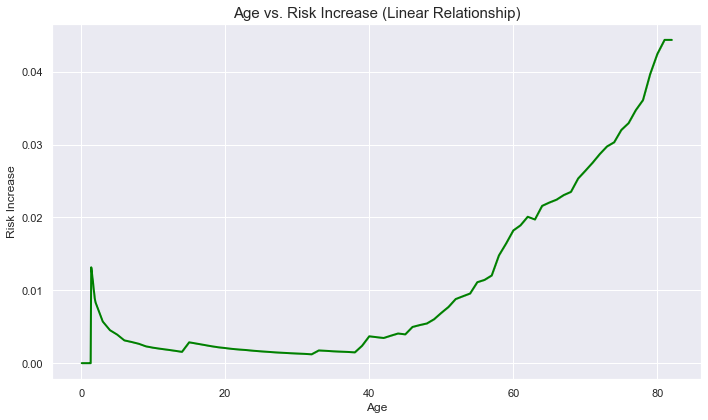

In [44]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='risk_increase', data=stroke_set, linewidth=2, markersize=8, color ="green")
plt.title('Age vs. Risk Increase (Linear Relationship)',fontsize=15)
plt.xlabel('Age')
plt.ylabel('Risk Increase')
plt.grid(True)
plt.tight_layout()
plt.show()

**From the chart above, we can observe a trend or pattern of how the " risk increase" of having stroke increases with age**

### Visualising Skewness in Age Distribution

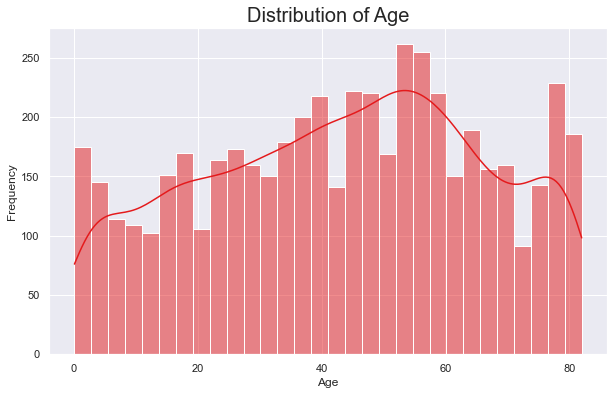

Skewness of Age: -0.1373898398980494


In [45]:
from scipy.stats import skew
# Plot the age distribution
plt.figure(figsize=(10, 6))

sns.histplot(stroke_set['age'], kde=True, bins=30)

plt.title('Distribution of Age',fontsize=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Calculate skewness
age_skewness = skew(stroke_set['age'])
print(f'Skewness of Age: {age_skewness}')


**The result(Skewness of Age) above shows that the data has a longer tail on the left side, suggesting there are relatively few younger people compared to the overall distribution. 
However, the slight skewness observed here cannot really affect the data**

In [46]:
stroke_set

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,risk_increase
0,9046,Male,67.0,0,1,Yes,Private,Urban,169.3575,36.600000,formerly smoked,1,0.023073
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,169.3575,28.893237,never smoked,1,0.018922
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.9200,32.500000,never smoked,1,0.042454
3,60182,Female,49.0,0,0,Yes,Private,Urban,169.3575,34.400000,smokes,1,0.006028
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.000000,never smoked,1,0.039686
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,18234,Female,80.0,1,0,Yes,Private,Urban,83.7500,28.893237,never smoked,0,0.042454
5105,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.2000,40.000000,never smoked,0,0.044379
5106,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.9900,30.600000,never smoked,0,0.001627
5107,37544,Male,51.0,0,0,Yes,Private,Rural,166.2900,25.600000,formerly smoked,0,0.007713


### Performing OneHotEncoding on the nominal variables in the dataset

In [47]:
#coverting categorical data to a dummy variable meaning into binary distribution
#using pandas to create a dummy variable
work_type_dummy = pd.get_dummies(stroke_set["work_type"],dtype=int)

In [48]:
work_type_dummy

,Govt_job,Never_worked,Private,Self-employed,children
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
5104,0,0,1,0,0
5105,0,0,0,1,0
5106,0,0,0,1,0
5107,0,0,1,0,0


### Dropping one column from the work_type_dummy to avoid multicollinearity

In [49]:
#Dropping one column from the work_type_dummy to avoid multicollinearity
work_dummy=work_type_dummy.drop(columns=["Never_worked"], axis=1)
work_dummy

,Govt_job,Private,Self-employed,children
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
5104,0,1,0,0
5105,0,0,1,0
5106,0,0,1,0
5107,0,1,0,0


In [50]:
#coverting categorical data to a dummy variable meaning into binary distribution
#using pandas to create a dummy variable
smoking_status_dummy =pd.get_dummies(stroke_set["smoking_status"],dtype = int)
smoking_status_dummy

,Unknown,formerly smoked,never smoked,smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
5104,0,0,1,0
5105,0,0,1,0
5106,0,0,1,0
5107,0,1,0,0


### Dropping one column from the smoking_status_dummy to avoid multicollinearity

In [51]:
#Dropping one column from the smoking_status_dummy to avoid multicollinearity
smoke_dummy=smoking_status_dummy.drop(columns=["Unknown"], axis=1)
smoke_dummy

,formerly smoked,never smoked,smokes
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
5104,0,1,0
5105,0,1,0
5106,0,1,0
5107,1,0,0


### Merging both work_dummy and the smoke_dummy into the dataset

In [52]:
merged_stroke_set=pd.concat([stroke_set, work_dummy, smoke_dummy],axis=1)
merged_stroke_set

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,risk_increase,Govt_job,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,169.3575,36.600000,formerly smoked,1,0.023073,0,1,0,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,169.3575,28.893237,never smoked,1,0.018922,0,0,1,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.9200,32.500000,never smoked,1,0.042454,0,1,0,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,169.3575,34.400000,smokes,1,0.006028,0,1,0,0,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.000000,never smoked,1,0.039686,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,18234,Female,80.0,1,0,Yes,Private,Urban,83.7500,28.893237,never smoked,0,0.042454,0,1,0,0,0,1,0
5105,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.2000,40.000000,never smoked,0,0.044379,0,0,1,0,0,1,0
5106,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.9900,30.600000,never smoked,0,0.001627,0,0,1,0,0,1,0
5107,37544,Male,51.0,0,0,Yes,Private,Rural,166.2900,25.600000,formerly smoked,0,0.007713,0,1,0,0,1,0,0


### Dropping irrelevant columns

In [53]:
stroke_set=merged_stroke_set.drop(["id","work_type","smoking_status"],axis=1)
stroke_set

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,risk_increase,Govt_job,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,Male,67.0,0,1,Yes,Urban,169.3575,36.600000,1,0.023073,0,1,0,0,1,0,0
1,Female,61.0,0,0,Yes,Rural,169.3575,28.893237,1,0.018922,0,0,1,0,0,1,0
2,Male,80.0,0,1,Yes,Rural,105.9200,32.500000,1,0.042454,0,1,0,0,0,1,0
3,Female,49.0,0,0,Yes,Urban,169.3575,34.400000,1,0.006028,0,1,0,0,0,0,1
4,Female,79.0,1,0,Yes,Rural,169.3575,24.000000,1,0.039686,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,80.0,1,0,Yes,Urban,83.7500,28.893237,0,0.042454,0,1,0,0,0,1,0
5105,Female,81.0,0,0,Yes,Urban,125.2000,40.000000,0,0.044379,0,0,1,0,0,1,0
5106,Female,35.0,0,0,Yes,Rural,82.9900,30.600000,0,0.001627,0,0,1,0,0,1,0
5107,Male,51.0,0,0,Yes,Rural,166.2900,25.600000,0,0.007713,0,1,0,0,1,0,0


### Encoding the Dichotomous Categorical Variable in the dataset

In [54]:
from sklearn.preprocessing import OneHotEncoder

In [55]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [56]:
# Fit and transform the ' Dichotomous Categorical Variable' column
stroke_set["gender_encoded"] = label_encoder.fit_transform(stroke_set["gender"])
stroke_set["ever_married_encoded"]=label_encoder.fit_transform(stroke_set["ever_married"])
stroke_set["Residence_type_encoded"]=label_encoder.fit_transform(stroke_set["Residence_type"])
stroke_set

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,risk_increase,Govt_job,Private,Self-employed,children,formerly smoked,never smoked,smokes,gender_encoded,ever_married_encoded,Residence_type_encoded
0,Male,67.0,0,1,Yes,Urban,169.3575,36.600000,1,0.023073,0,1,0,0,1,0,0,1,1,1
1,Female,61.0,0,0,Yes,Rural,169.3575,28.893237,1,0.018922,0,0,1,0,0,1,0,0,1,0
2,Male,80.0,0,1,Yes,Rural,105.9200,32.500000,1,0.042454,0,1,0,0,0,1,0,1,1,0
3,Female,49.0,0,0,Yes,Urban,169.3575,34.400000,1,0.006028,0,1,0,0,0,0,1,0,1,1
4,Female,79.0,1,0,Yes,Rural,169.3575,24.000000,1,0.039686,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,80.0,1,0,Yes,Urban,83.7500,28.893237,0,0.042454,0,1,0,0,0,1,0,0,1,1
5105,Female,81.0,0,0,Yes,Urban,125.2000,40.000000,0,0.044379,0,0,1,0,0,1,0,0,1,1
5106,Female,35.0,0,0,Yes,Rural,82.9900,30.600000,0,0.001627,0,0,1,0,0,1,0,0,1,0
5107,Male,51.0,0,0,Yes,Rural,166.2900,25.600000,0,0.007713,0,1,0,0,1,0,0,1,1,0


### Dropping the Dichotomous Categorical Variable

In [57]:
new_stroke_set=stroke_set.drop(["gender","ever_married","Residence_type"],axis=1)
new_stroke_set

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,risk_increase,Govt_job,Private,Self-employed,children,formerly smoked,never smoked,smokes,gender_encoded,ever_married_encoded,Residence_type_encoded
0,67.0,0,1,169.3575,36.600000,1,0.023073,0,1,0,0,1,0,0,1,1,1
1,61.0,0,0,169.3575,28.893237,1,0.018922,0,0,1,0,0,1,0,0,1,0
2,80.0,0,1,105.9200,32.500000,1,0.042454,0,1,0,0,0,1,0,1,1,0
3,49.0,0,0,169.3575,34.400000,1,0.006028,0,1,0,0,0,0,1,0,1,1
4,79.0,1,0,169.3575,24.000000,1,0.039686,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,80.0,1,0,83.7500,28.893237,0,0.042454,0,1,0,0,0,1,0,0,1,1
5105,81.0,0,0,125.2000,40.000000,0,0.044379,0,0,1,0,0,1,0,0,1,1
5106,35.0,0,0,82.9900,30.600000,0,0.001627,0,0,1,0,0,1,0,0,1,0
5107,51.0,0,0,166.2900,25.600000,0,0.007713,0,1,0,0,1,0,0,1,1,0


## FEATURE SELECTION WITH CORRELATION METHOD

In [58]:
new_stroke_set_corr=new_stroke_set.corr()
new_stroke_set_corr

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,risk_increase,Govt_job,Private,Self-employed,children,formerly smoked,never smoked,smokes,gender_encoded,ever_married_encoded,Residence_type_encoded
age,1.000000,0.276367,0.263777,0.199953,0.352767,0.245239,0.826871,0.129965,0.116678,0.327949,-0.634320,0.237347,0.119207,0.073075,-0.027752,0.679084,0.014031
hypertension,0.276367,1.000000,0.108292,0.156920,0.156512,0.127891,0.265078,0.017661,-0.005358,0.115417,-0.129535,0.059022,0.065018,0.031213,0.021223,0.164187,-0.007980
heart_disease,0.263777,0.108292,1.000000,0.139868,0.046758,0.134905,0.304026,0.001312,0.000068,0.086742,-0.091654,0.066938,-0.021893,0.044030,0.085685,0.114601,0.003045
avg_glucose_level,0.199953,0.156920,0.139868,1.000000,0.153530,0.115727,0.187335,0.009537,0.013888,0.052577,-0.084163,0.052669,0.022176,0.013882,0.054074,0.133700,-0.005809
bmi,0.352767,0.156512,0.046758,0.153530,1.000000,0.045729,0.093014,0.085489,0.211162,0.078973,-0.469408,0.115495,0.110742,0.092402,-0.023524,0.357466,0.004200
stroke,0.245239,0.127891,0.134905,0.115727,0.045729,1.000000,0.282070,0.002660,0.011927,0.062150,-0.083888,0.064683,-0.004163,0.008920,0.009081,0.108299,0.015415
risk_increase,0.826871,0.265078,0.304026,0.187335,0.093014,0.282070,1.000000,0.024624,-0.080492,0.324755,-0.247427,0.182298,0.029348,-0.036752,0.006249,0.379996,0.018265
Govt_job,0.129965,0.017661,0.001312,0.009537,0.085489,0.002660,0.024624,1.000000,-0.444394,-0.167849,-0.151417,0.029865,0.046854,0.029994,-0.016598,0.133964,0.013056
Private,0.116678,-0.005358,0.000068,0.013888,0.211162,0.011927,-0.080492,-0.444394,1.000000,-0.505448,-0.455965,0.025170,0.105003,0.100107,-0.032502,0.154104,-0.018005
Self-employed,0.327949,0.115417,0.086742,0.052577,0.078973,0.062150,0.324755,-0.167849,-0.505448,1.000000,-0.172219,0.093492,0.030605,-0.003663,-0.026045,0.192637,0.010508


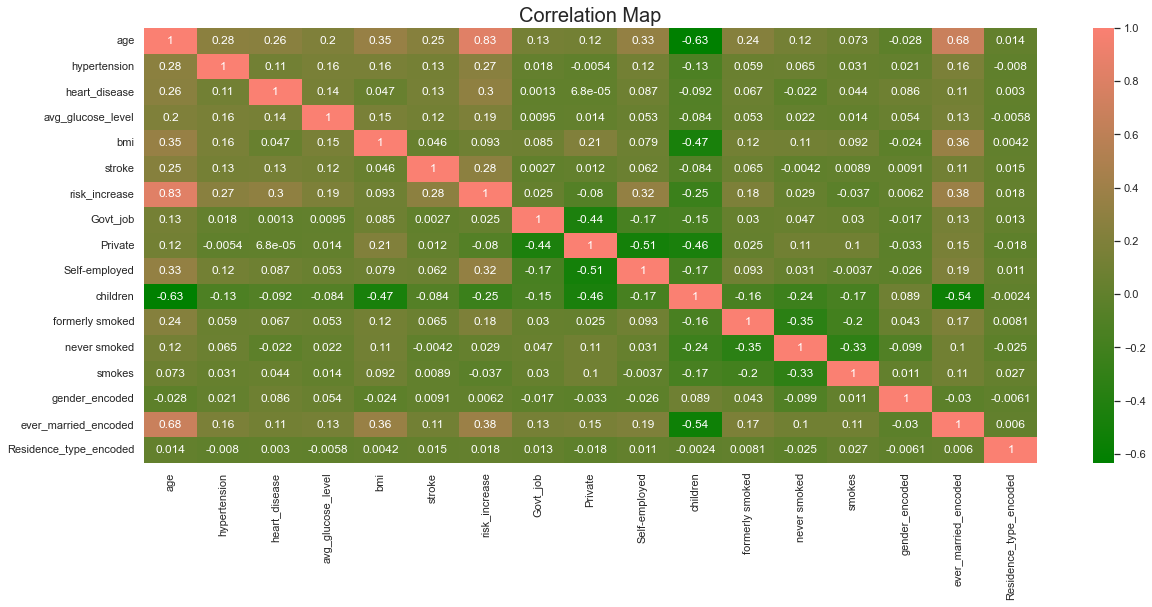

In [59]:
#visualizing correlation
from matplotlib.colors import LinearSegmentedColormap
plt.figure(figsize=(20,8))
sns.heatmap(data=new_stroke_set_corr,annot=True,cmap=LinearSegmentedColormap.from_list('custom_cmap', ['green', 'salmon']))
plt.title("Correlation Map", fontdict={"fontsize":20})
plt.show()

# Handling Data Imbalance

### visualising the balance of the stroke column in the dataset using a pie chart

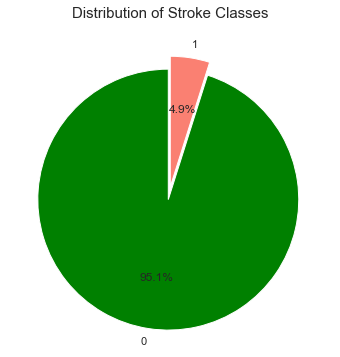

In [60]:
# Count the number of occurrences for each class in the 'stroke' column
stroke_counts = new_stroke_set['stroke'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', startangle=90, explode=(.1,0),colors=['green', 'salmon'])
plt.title('Distribution of Stroke Classes',fontsize = 15)
plt.show()

**From the above analysis, it's evident that the `stroke` column in the dataset is highly imbalanced: instances of stroke are 4.9%, while instances of no stroke are 95.1%.(which implies that both classes are not represented equally)**

### We can now futher balance the data by using SMOTE (Oversampling technique)  ensuring both classes are represented more equally for better model training

In [61]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority',random_state=42,n_jobs=-1)
X=new_stroke_set.loc[:,new_stroke_set.columns!='stroke']
y=new_stroke_set.loc[:,new_stroke_set.columns=='stroke']
x_smote,y_smote=smote.fit_resample(X,y)


### After using SMOTE (Oversampling technique)

In [62]:
print(f'After SMOTE, Total Sample {y_smote.shape[0]}')
print(f'Before SMOTE, Total Sample {new_stroke_set.shape[0]}')
print("Positive Sample {}".format((y_smote['stroke']==1).sum()))
print("Negative Sample {}".format((y_smote['stroke']==0).sum()))

After SMOTE, Total Sample 9720
Before SMOTE, Total Sample 5109
Positive Sample 4860
Negative Sample 4860


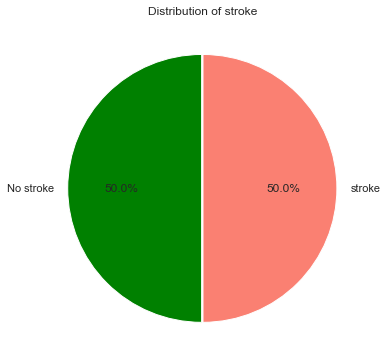

In [63]:
plt.figure(figsize=(6,8))
plt.pie(y_smote['stroke'].value_counts(),
        labels=['No stroke','stroke'],
        explode=(.01,0),colors=['green','salmon'],
        autopct="%1.1f%%",startangle=90)
plt.title('Distribution of stroke')
plt.show()

In [64]:
x_smote

,age,hypertension,heart_disease,avg_glucose_level,bmi,risk_increase,Govt_job,Private,Self-employed,children,formerly smoked,never smoked,smokes,gender_encoded,ever_married_encoded,Residence_type_encoded
0,67.000000,0,1,169.357500,36.600000,0.023073,0,1,0,0,1,0,0,1,1,1
1,61.000000,0,0,169.357500,28.893237,0.018922,0,0,1,0,0,1,0,0,1,0
2,80.000000,0,1,105.920000,32.500000,0.042454,0,1,0,0,0,1,0,1,1,0
3,49.000000,0,0,169.357500,34.400000,0.006028,0,1,0,0,0,0,1,0,1,1
4,79.000000,1,0,169.357500,24.000000,0.039686,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9715,77.957575,0,0,75.369213,28.898989,0.036049,0,0,0,0,1,0,0,0,1,0
9716,78.691367,0,0,169.357500,24.864171,0.038581,0,0,1,0,0,0,0,0,1,0
9717,70.609028,0,0,169.357500,38.778194,0.026986,0,0,0,0,0,0,0,0,1,0
9718,80.000000,0,0,169.357500,31.660184,0.042454,0,1,0,0,0,0,0,1,1,0


In [65]:
y_smote

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
9715,1
9716,1
9717,1
9718,1


In [66]:
#Rechecking if it has any null value
new_stroke_set.isnull().sum()

age                       0
hypertension              0
heart_disease             0
avg_glucose_level         0
bmi                       0
stroke                    0
risk_increase             0
Govt_job                  0
Private                   0
Self-employed             0
children                  0
formerly smoked           0
never smoked              0
smokes                    0
gender_encoded            0
ever_married_encoded      0
Residence_type_encoded    0
dtype: int64

In [67]:
X=x_smote
y=y_smote

In [68]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [69]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import  XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report 
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [70]:
scaler=StandardScaler()
scaler

StandardScaler()

In [71]:
X_normalize =pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_normalize

,age,hypertension,heart_disease,avg_glucose_level,bmi,risk_increase,Govt_job,Private,Self-employed,children,formerly smoked,never smoked,smokes,gender_encoded,ever_married_encoded,Residence_type_encoded
0,0.535496,-0.306358,4.307824,1.565740,1.141701,0.313217,-0.286223,1.036467,-0.377609,-0.276427,2.601881,-0.611116,-0.330468,1.449644,0.627494,1.206817
1,0.264523,-0.306358,-0.232136,1.565740,-0.080160,0.026708,-0.286223,-0.964816,2.648243,-0.276427,-0.384337,1.636349,-0.330468,-0.689825,0.627494,-0.828626
2,1.122603,-0.306358,4.307824,-0.086777,0.491671,1.650960,-0.286223,1.036467,-0.377609,-0.276427,-0.384337,1.636349,-0.330468,1.449644,0.627494,-0.828626
3,-0.277422,-0.306358,-0.232136,1.565740,0.792904,-0.863308,-0.286223,1.036467,-0.377609,-0.276427,-0.384337,-0.611116,3.026011,-0.689825,0.627494,1.206817
4,1.077441,3.264150,-0.232136,1.565740,-0.855953,1.459901,-0.286223,-0.964816,2.648243,-0.276427,-0.384337,1.636349,-0.330468,-0.689825,0.627494,-0.828626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9715,1.030363,-0.306358,-0.232136,-0.882611,-0.079248,1.208843,-0.286223,-0.964816,-0.377609,-0.276427,2.601881,-0.611116,-0.330468,-0.689825,0.627494,-0.828626
9716,1.063503,-0.306358,-0.232136,1.565740,-0.718944,1.383647,-0.286223,-0.964816,2.648243,-0.276427,-0.384337,-0.611116,-0.330468,-0.689825,0.627494,-0.828626
9717,0.698487,-0.306358,-0.232136,1.565740,1.487041,0.583281,-0.286223,-0.964816,-0.377609,-0.276427,-0.384337,-0.611116,-0.330468,-0.689825,0.627494,-0.828626
9718,1.122603,-0.306358,-0.232136,1.565740,0.358523,1.650960,-0.286223,1.036467,-0.377609,-0.276427,-0.384337,-0.611116,-0.330468,1.449644,0.627494,-0.828626


In [72]:
#spliting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_normalize, y, test_size=0.2, random_state=42)

In [73]:
len(y_test)

1944

In [74]:
len(X_train)

7776

### Comparing different machine learning models for predicting stroke risk, by implementing a function that trains and evaluates multiple classifiers

In [75]:

classifiers=[LogisticRegression(random_state=42),RandomForestClassifier(random_state=42), 
            SVC(random_state=42),XGBClassifier(random_state=42), LGBMClassifier(random_state=42)]
model_names= ["Logistic Regression","Random Forest", "Support Vector Machine","XGradient boost","LightGBM"]

In [76]:
def train_val_models(classifiers, model_names, X_train, X_test, y_train, y_test):
    reports = []
    for clf, model in zip(classifiers, model_names):
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        report = classification_report(y_test, y_pred)
        reports.append(report)
    return model_names, reports

In [77]:
model_names, report = train_val_models(classifiers, model_names, X_train, X_test, y_train, y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3892, number of negative: 3884
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1056
[LightGBM] [Info] Number of data points in the train set: 7776, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500514 -> initscore=0.002058
[LightGBM] [Info] Start training from score 0.002058


###  EVALUATION METRICS

In [78]:
for name, report in zip(model_names, report):
    print(name)
    print(report)
    print("\n\n")

Logistic Regression
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       976
           1       0.90      0.88      0.89       968

    accuracy                           0.89      1944
   macro avg       0.89      0.89      0.89      1944
weighted avg       0.89      0.89      0.89      1944




Random Forest
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       976
           1       0.96      0.96      0.96       968

    accuracy                           0.96      1944
   macro avg       0.96      0.96      0.96      1944
weighted avg       0.96      0.96      0.96      1944




Support Vector Machine
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       976
           1       0.92      0.92      0.92       968

    accuracy                           0.92      1944
   macro avg       0.92      0.92      0.92      1944
weighted av

**From the metrics we evaluated:**


### Recall:
- **What it means**: Recall measures how good the model is at identifies all the positive cases.
    
### Precision:
- **What it means**: Precision measures how many of the positive predictions made by the model are actually correct.

### F1 Score:
- **What it means**: The F1 score is a balance between precision and recall. It is useful when you need to find an equilibrium between these two metrics.

### Accuracy:
- **What it means**: Accuracy measures how often the model makes correct predictions, both positive and negative.

**These metrics help us understand how well a machine learning model is performing, especially in tasks like predicting health risks where both false positives (incorrectly predicting a stroke) and false negatives (missing an actual stroke) can have serious consequences.**

In [122]:
# List of model names and their corresponding accuracy values
model_names = [
    "Logistic Regression",
    "Random Forest",
    "Support Vector Machine",
    "XGradient Boost",
    "LightGBM"
]

# List of accuracy values corresponding to each model
accuracies = [0.89, 0.96, 0.92, 0.96, 0.96]

# Find the index of the model with the highest accuracy
best_model_index = accuracies.index(max(accuracies))

# Retrieve the best model name and accuracy
best_model_name = model_names[best_model_index]
best_model_accuracy = accuracies[best_model_index]

# Print the best model and its accuracy
print(f"Best Model before tuning: {best_model_name}")
print(f"Accuracy of Best Model: {best_model_accuracy:.4f}")


Best Model before tuning: Random Forest
Accuracy of Best Model: 0.9600


# Hyperparameter Tuning

**- We will be using hyperparameter tuning to Enhance Model's Performance,Even though our models performed well initially**


**- Hyperparameter tuning helps us fine-tune these settings and also helps to optimize the model to achieve even better performance on unseen data.**

**-This ensures that the model generalizes well and performs effectively when deployed in real-world scenarios.**


**- Using or Implementing the tuned models in real-world scenarios will lead to more reliable predictions.**

In [80]:
from sklearn.model_selection import GridSearchCV

### Random Forest

In [81]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}



### Xgboost

In [82]:
xgb_param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'n_estimators': [100, 200, 300]
}


### LightGBM

In [83]:
lgbm_param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'n_estimators': [100, 200, 300]
}


### Support Vector Machine

In [84]:
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}


In [85]:
# Initialize GridSearchCV for each model
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
xgb_grid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid=xgb_param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
lgbm_grid_search = GridSearchCV(LGBMClassifier(random_state=42), param_grid=lgbm_param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
svm_grid_search = GridSearchCV(SVC(random_state=42), param_grid=svm_param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV for each model
rf_grid_search.fit(X_train, y_train)
xgb_grid_search.fit(X_train, y_train)
lgbm_grid_search.fit(X_train, y_train)
svm_grid_search.fit(X_train, y_train)

# Print best parameters and best score for each model
print("Random Forest Best Parameters:", rf_grid_search.best_params_)
print("Random Forest Best Score:", rf_grid_search.best_score_)

print("XGBoost Best Parameters:", xgb_grid_search.best_params_)
print("XGBoost Best Score:", xgb_grid_search.best_score_)

print("LightGBM Best Parameters:", lgbm_grid_search.best_params_)
print("LightGBM Best Score:", lgbm_grid_search.best_score_)

print("SVM Best Parameters:", svm_grid_search.best_params_)
print("SVM Best Score:", svm_grid_search.best_score_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3892, number of negative: 3884
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1056
[LightGBM] [Info] Number of data points in the train set: 7776, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=

## Comparison of the model performances after tuning.

In [86]:
import pandas as pd

# Data
data = {
    'Model': ['LightGBM','XGBoost','Random Forest', 'SVM'],
    'Best Score': [0.9635,0.9617, 0.9572, 0.9253]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,Model,Best Score
0,LightGBM,0.9635
1,XGBoost,0.9617
2,Random Forest,0.9572
3,SVM,0.9253


**After hyperparameter tuning, LightGBM emerged as the best-performing model with the highest score of 0.9635. Deploying these tuned models in real-world scenarios will likely lead to more reliable predictions, enhancing overall performance and reliability.** 

# Generating The Confusion Matrix After Hyperparameter Tuning

In [98]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay, confusion_matrix

# Assuming the best parameters have been found
lgbm_params = {
    'colsample_bytree': 1.0,
    'learning_rate': 0.3,
    'max_depth': 7,
    'n_estimators': 200,
    'subsample': 0.8
}

# Load your dataset
# X_train, X_test, y_train, y_test = ...

# Train the LightGBM model
lgbm_model = LGBMClassifier(**lgbm_params, random_state=42)
lgbm_model.fit(X_train, y_train)
# Predict on the test set



[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3892, number of negative: 3884
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1056
[LightGBM] [Info] Number of data points in the train set: 7776, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500514 -> initscore=0.002058
[LightGBM] [Info] Start training from score 0.002058
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

LGBMClassifier(learning_rate=0.3, max_depth=7, n_estimators=200,
               random_state=42, subsample=0.8)

# From our tuned models, lightGBM emerged best, Hence we will now Use it to predict stroke outcomes on the test set.

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


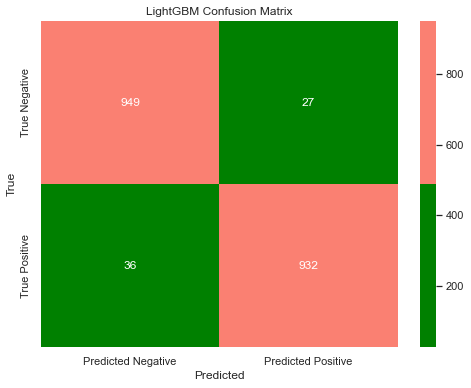

In [101]:

y_pred = lgbm_model.predict(X_test)
y_pred = np.round(y_pred) 

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['True Negative', 'True Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap=["green","salmon"])
plt.title('LightGBM Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

- **949 (TN):** There are 949 instances that are Truly negative and predicted as negative.
- **27 (FP):** There are 8 instances that are Truly negative but predicted as positive.
- **36 (FN):** There are 15 instances that are Truly positive but predicted as negative.
- **932 (TP):** There are 92 instances that are Truly positive and predicted as positive.

# Cross Validation

**-Performing cross-validation after hyperparameter tuning helps confirm that the model's performance is consistent and reliable across different subsets of the data.**

In [102]:
from sklearn.model_selection import cross_val_score

# Assuming the best parameters have been found
rf_params = {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
xgb_params = {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 1.0}
lgbm_params = {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
svm_params = {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

# Load your dataset
# Assuming X is the feature matrix and y is the target variable
# X, y = ...

# Define models with best hyperparameters
models = {
    'Random Forest': RandomForestClassifier(**rf_params, random_state=42),
    'XGBoost': XGBClassifier(**xgb_params, use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(**lgbm_params, random_state=42),
    'SVM': SVC(**svm_params, random_state=42)
}

# Perform cross-validation and print the results
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f"{model_name} cross-validation scores: {cv_scores}")
    print(f"{model_name} mean cross-validation score: {np.mean(cv_scores)}")
    print("-" * 50)


Random Forest cross-validation scores: [0.89146091 0.97376543 0.97119342 0.97839506 0.97736626]
Random Forest mean cross-validation score: 0.9584362139917696
--------------------------------------------------
XGBoost cross-validation scores: [0.89248971 0.98148148 0.9691358  0.97633745 0.98199588]
XGBoost mean cross-validation score: 0.9602880658436213
--------------------------------------------------
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3888, number of negative: 3888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not en

In [103]:
# Define the mean cross-validation scores from the output
data = {"mean cross-validation score":['LightGBM','XGBoost','Random Forest','SVM'],"Best score":[0.9609,0.9603,0.958,0.8172]}
    

df=pd.DataFrame(data)
df

,mean cross-validation score,Best score
0,LightGBM,0.9609
1,XGBoost,0.9603
2,Random Forest,0.9580
3,SVM,0.8172


**From the result above, we can clearly see that LightGBM or XGBoost would be the preferred models for making predictions in real-world scenarios due to their higher mean cross-validation scores, which indicates better generalization ability.**

# Doing an Hold out test on the best model(LightGBM), to see how it will perform on unseen data

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score

# Assuming you have a dataset 'X' and target 'y' prepared

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LightGBM classifier with best-tuned parameters
lgbm_params = {
    'colsample_bytree': 1.0,
    'learning_rate': 0.3,
    'max_depth': 7,
    'n_estimators': 200,
    'subsample': 0.8
}

lgbm_model = LGBMClassifier(**lgbm_params)

# Train the model on the training set
lgbm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lgbm_model.predict(X_test)

# Evaluate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3892, number of negative: 3884
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1044
[LightGBM] [Info] Number of data points in the train set: 7776, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500514 -> initscore=0.002058
[LightGBM] [Info] Start training from score 0.002058
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

In [108]:
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [0.9655, 0.9747, 0.9556, 0.9650]
}

# Create the DataFrame
df_metrics = pd.DataFrame(metrics)

# Display the DataFrame
df_metrics


,Metric,Score
0,Accuracy,0.9655
1,Precision,0.9747
2,Recall,0.9556
3,F1 Score,0.9650


### FROM THE HOLD OUT TEST DONE ON THE BEST MODEL, WE CAN OBSERVE THAT:
    ** Our model achieved an accuracy of 97% on the hold-out test set, indicating it correctly predicted the outcome 97% of the time. The precision of 97% shows that when the model predicted a positive outcome, it was correct 97% of the time. The recall of 96% means that the model correctly identified 96%% of all True positive outcomes. The F1 score of 97% balances precision and recall, confirming the model's strong performance.**

# Generating The Confusion Matrix After Hold Out Test, To See How It Will Perform On Unseen Data

-- **The confusion matrix evaluates a classification model's performance by displaying the counts of correct and incorrect predictions for each class, helping to identify errors and accuracy.**

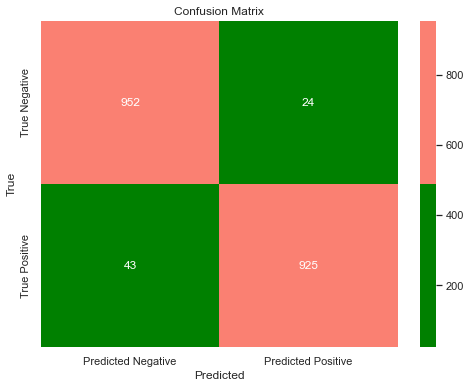

In [109]:
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Creating a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['True Negative', 'True Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap=["green","salmon"])
plt.title('Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()


- **88 (TN):** There are 88 instances that are Truly negative and predicted as negative.
- **8 (FP):** There are 8 instances that are Truly negative but predicted as positive.
- **15 (FN):** There are 15 instances that are Truly positive but predicted as negative.
- **92 (TP):** There are 92 instances that are Truly positive and predicted as positive.


In [110]:
!pip install shap

##  We will use shap to interpret machine learning model predictions by showing the impact of each feature on the final decision, helping us to understand and trust the model's reasoning.

In [113]:
import lightgbm as lgb
import shap

# Assuming you have your training data in X_train, y_train
train_data = lgb.Dataset(X_train, label=y_train)
param = {'num_leaves': 31, 'objective': 'binary'}
num_round = 100
model = lgb.train(param, train_data, num_round)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3892, number of negative: 3884
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1044
[LightGBM] [Info] Number of data points in the train set: 7776, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500514 -> initscore=0.002058
[LightGBM] [Info] Start training from score 0.002058


## SHAP is used on healthcare datasets to make machine learning models more understandable, trustworthy, and actionable for healthcare professionals, ensuring better patient care and more ethical AI practices.

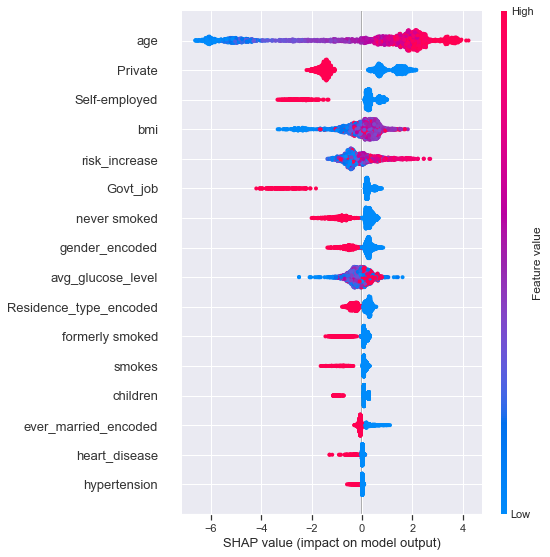

In [115]:
# Create SHAP values using TreeExplainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot the summary plot
shap.summary_plot(shap_values, X_test)



### From the shap values above, we could observe that:
   **The model is mostly influenced by age, job type, lifestyle habits, and health behaviors. This means that these factors are very important in predicting the outcome**
   

# Saving our machine learning model using joblib

In [118]:
import joblib
# Assuming `best_lgbm_model` is your trained LightGBM model
joblib_file = "Lgbm_model.pkl"
joblib.dump(lgbm_model, joblib_file)
print(f"Model saved as {joblib_file}")


Model saved as Lgbm_model.pkl


### DEPLOYMENT!!!!!

**We can now deploy our model.**

**Thank you! 😊**